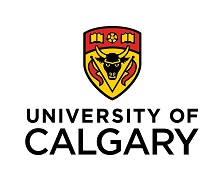

In [1]:
from IPython.display import Image
Image("../Images/Logo.jpg")

# <center>Graduate Project ENEL 698</center>
<center><a href = "https://github.com/isohels/Graduate-Project">Github Link</a></center>

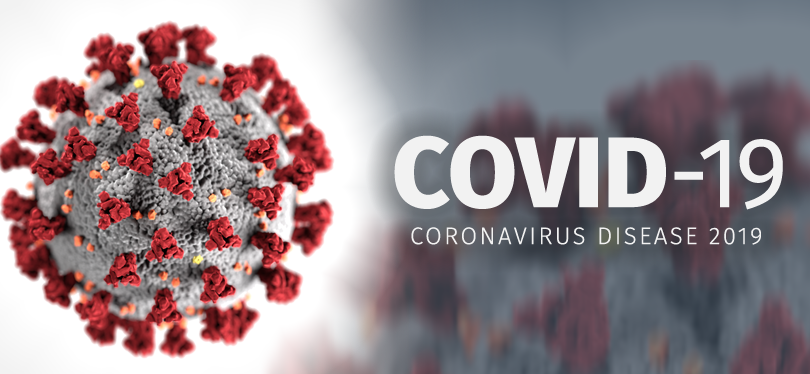

In [3]:
Image("../Images/Covid-19.png")

## This Notebook constitues of analysis of **Effectiveness of inter/inner travel restrictions** for reducing Coronavirus Disease 2019 (COVID-19) transmission.

## Objective and Scope
### Quarantine measures have been implemented around the world in response to the global spread of severe acute respiratory syndrome-coronavirus 2 (SARS-CoV-2). This analysis helps in understanding how travel and quarantine affect the dynamics of the propagation of this new human virus.
  - This analysis will address the following question:
1. This anlaysis will tell us what is the effectiveness of inter/inner travel restrictions on reducing transmission of COVID-19?

####  Lets load the intervention scan data (Canada Specific)
- Data Source - <a href = "https://www.cihi.ca/en">For more info please click here</a>.

In [5]:
#importing the necessary files required for visualization and statistical analysis

import requests

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objects as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [6]:
intervention_scan = pd.ExcelFile('../covid_data/Data/InterventionScanCanada/covid-19-intervention-scan-data-tables-en.xlsx')

# Its a big datasheet lets see how many sheets it constitutes

print("This dataset contains {} sheets {}.".format(len(intervention_scan.sheet_names), intervention_scan.sheet_names))

This dataset contains 6 sheets ['COVID-19 Intervention Scan', 'Notes to readers', 'Intervention scan', 'Data dictionary', 'Version history', 'Filters'].


#### Loading Individual Sheets

In [7]:
# Parsing Individual sheets to gather data specific information

intervention_scan_data_info = intervention_scan.parse('COVID-19 Intervention Scan')
intervention_scan_data_info.head()

,"Screen reader users: This workbook has 5 worksheets, including this title page, notes to readers on tab 2, an intervention scan on tab 3, a data dictionary on tab 4 and version history on tab 5."
0,COVID-19 Intervention Scan — Data Tables
1,This data table provides information on select...
2,"Unless otherwise indicated, this product uses ..."
3,Additional resources
4,To learn more about data and information on CO...


In [8]:
pd.set_option('display.max_colwidth', -1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



In [9]:
intervention_scan_notes_to_reader = intervention_scan.parse('Notes to readers')
intervention_scan_notes_to_reader

,Notes to readers
0,"This data table provides information on select interventions (policies and other measures) to stop the spread and improve health outcomes from COVID-19 by jurisdiction (Canada, province and territory)."
1,Data sources
2,"Primary sources of data include announcements of interventions on the following websites: ministry press releases, ministry websites, federal/provincial/territorial public health agency websites, Indigenous organizations as well as provincial and territorial regulatory bodies for health professions. Secondary sources of data include additional links (e.g., media articles, updated releases, and supporting documentation) that provide more information not covered in the primary source."
3,Scope and search strategy
4,"• The scan provides comprehensive information on key health interventions for case finding and management, physical distancing, health workforce capacity, health services and travel restrictions. Contextual information, such as the timing of spring breaks, is also included.\n• The search strategy for this scan is limited to interventions announced or implemented by the federal, provincial and territorial governments, along with regulatory bodies of select health professions. Interventions announced by national Indigenous organizations (e.g., Assembly of First Nations, National Association of Friendship Centres) are also included. \n• Interventions related to Indigenous groups are noted in the Indigenous population group column. \n• Interventions announced below the provincial and territorial level were considered out of scope for the data collection search strategy. In some instances, however, health region or municipal level interventions are included in provincial and territorial announcements and may be tracked in this document. Regional and municipal entries can be identified by filtering by the “Level” column.\n• See Data dictionary tab for more information on the scope and categorization of interventions for this project."
5,Accuracy and maintenance:
6,"• This project started on March 19, 2020. Accuracy is limited by the availability of information and timing of data collection. Previous versions of documents are generally not accessible on ministry websites. Where possible, Internet Archive was used to access old versions of ministry web pages. Some interventions may have been missed because of the timing of this project's initiation, the use of official government press releases as primary sources or the scope of the intervention categories and types. \n• The COVID-19 situation is dynamic. Interventions and links are changing daily, so there may be differences between the current version of official websites and this resource. \n• This scan will be updated to include new or edited content on a regular basis.\n• See Version history tab for date last updated."
7,Keywords
8,"To find other information on this subject, use the following search terms: COVID-19, coronavirus, infectious disease, outbreak, pandemic, case management, closures, openings, health services, health workforce, state of emergency, travel, distancing, public information, financial and economic."
9,Terms of Use


In [10]:
intervention_scan_DataDictionary = intervention_scan.parse('Data dictionary')
intervention_scan_DataDictionary

,Screen reader users: This tab contains 2 tables. The first table is called Table 2: Column attributes. It begins at cell A8 and ends at cell B20. The second table is called Table 3: Intervention attributes. It begins at cell A22 and ends at cell D61.,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Data dictionary,NaN,NaN,NaN
1,"This tab provides a list of variables, intervention types and their descriptions for CIHI's COVID-19 Intervention Scan.",NaN,NaN,NaN
2,Data set description:,COVID-19 Intervention Scan,NaN,NaN
3,Data current to:,2020-06-22 00:00:00,NaN,NaN
4,Update frequency:,Ad hoc,NaN,NaN
5,Publication date:,2020-08-18 00:00:00,NaN,NaN
6,Table 2 Column attributes,NaN,NaN,NaN
7,Variable name,Variable description,NaN,NaN
8,Entry ID,A unique alpha-numeric identifier that allows users of the scan to identify an entry if they have questions about it.,NaN,NaN
9,Jurisdiction,"Jurisdiction covered by the intervention or announcement (i.e., Canada, the province or the territory).",NaN,NaN


In [11]:
intervention_scan_versionhistory = intervention_scan.parse('Version history')
intervention_scan_versionhistory

,Screen reader users: There is 1 table on this tab called Table 4: Version history. It begins at cell A3 and ends at cell B6.,Unnamed: 1
0,Table 4 Version history,NaN
1,Publication date,Changes made
2,2020-06-18 00:00:00,Initial release. Includes announcements up to May 5.
3,2020-07-14 00:00:00,Updated to include announcements up to May 27.
4,2020-08-18 00:00:00,Updated to include announcements up to June 22.


In [13]:
#### Now Lets see the Dataframe

intervention_scan_data = intervention_scan.parse('Intervention scan',header=2)
intervention_scan_data.head(5)

,Entry ID,Jurisdiction,Date announced,Date implemented,Intervention category,Intervention type,Intervention summary,Primary source\n(news release or specific resource),Secondary source,Level,...,Column16364,Column16365,Column16366,Column16367,Column16368,Column16369,Column16370,Column16371,Column16372,Column16373
0,BC007,B.C.,2020-03-15 00:00:00,2020-03-16 00:00:00,Case management,Case management — test criteria,"Who: BC Centre for Disease Control, Provincial Health Services Authority\nWhat: Testing criteria first published. Testing is prioritized for patients with respiratory symptoms who are hospitalized or likely to be hospitalized; health care workers; residents of long term care facilities; part of an investigation of a cluster or outbreak.\nEffective until:",http://www.bccdc.ca/health-info/diseases-conditions/covid-19/testing/phases-of-covid-19-testing-in-bc,http://www.bccdc.ca/Health-Professionals-Site/Documents/PHSA-labtesting-archived-summary.pdf,Provincial/territorial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ON021,Ont.,2020-03-17 00:00:00,2020-03-17 00:00:00,Closures,Closures — recreation,"Who: Office of the Premier\nWhat: Closed all facilities providing indoor recreational programs and public libraries, with subsequent extensions (see secondary source column)\nEffective until: 2020-06-12",https://news.ontario.ca/opo/en/2020/03/ontario-enacts-declaration-of-emergency-to-protect-the-public.html,https://www.ontario.ca/laws/regulation/200051?_ga=2.184837289.1860153609.1592920176-470745044.1584640249,Provincial/territorial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ON022,Ont.,2020-03-17 00:00:00,2020-03-17 00:00:00,Closures,Closures — recreation,"Who: Office of the Premier\nWhat: Closed all theatres including those offering live performances of music, dance and other art forms, as well as cinemas that show movies and concert venues, with subsequent extensions (see secondary source column)\nEffective until: 2020-06-12",https://news.ontario.ca/opo/en/2020/03/ontario-enacts-declaration-of-emergency-to-protect-the-public.html,https://www.ontario.ca/laws/regulation/200051?_ga=2.184837289.1860153609.1592920176-470745044.1584640249,Provincial/territorial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ON023,Ont.,2020-03-17 00:00:00,2020-03-17 00:00:00,Closures,Closures — non-essential services,"Who: Office of the Premier\nWhat: Closures of all bars and restaurants, except to the extent that such facilities provide takeout food and delivery, with subsequent extensions (see secondary source column)\nEffective until: 2020-06-12",https://news.ontario.ca/opo/en/2020/03/ontario-enacts-declaration-of-emergency-to-protect-the-public.html,https://www.ontario.ca/laws/regulation/200051?_ga=2.184837289.1860153609.1592920176-470745044.1584640249,Provincial/territorial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ON111,Ont.,2020-03-17 00:00:00,2020-03-17 00:00:00,Closures,Closures — daycares,"Who: Office of the Premier\nWhat: Closures of all licensed child care facilities and EarlyON programs, with subsequent extensions (see secondary source column)\nEffective until: 2020-06-12",https://news.ontario.ca/opo/en/2020/03/ontario-enacts-declaration-of-emergency-to-protect-the-public.html,https://www.ontario.ca/laws/regulation/200051?_ga=2.184837289.1860153609.1592920176-470745044.1584640249,Provincial/territorial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
intervention_scan_data = intervention_scan_data.loc[:,:'Indigenous \npopulation group']
print(intervention_scan_data.columns)
intervention_scan_data.head()

Index(['Entry ID', 'Jurisdiction ', 'Date announced', 'Date implemented',
       'Intervention category', 'Intervention type', 'Intervention summary',
       'Primary source\n(news release or specific resource)',
       'Secondary source', 'Level', 'Indigenous \npopulation group'],
      dtype='object')


,Entry ID,Jurisdiction,Date announced,Date implemented,Intervention category,Intervention type,Intervention summary,Primary source\n(news release or specific resource),Secondary source,Level,Indigenous \npopulation group
0,BC007,B.C.,2020-03-15 00:00:00,2020-03-16 00:00:00,Case management,Case management — test criteria,"Who: BC Centre for Disease Control, Provincial Health Services Authority\nWhat: Testing criteria first published. Testing is prioritized for patients with respiratory symptoms who are hospitalized or likely to be hospitalized; health care workers; residents of long term care facilities; part of an investigation of a cluster or outbreak.\nEffective until:",http://www.bccdc.ca/health-info/diseases-conditions/covid-19/testing/phases-of-covid-19-testing-in-bc,http://www.bccdc.ca/Health-Professionals-Site/Documents/PHSA-labtesting-archived-summary.pdf,Provincial/territorial,No
1,ON021,Ont.,2020-03-17 00:00:00,2020-03-17 00:00:00,Closures,Closures — recreation,"Who: Office of the Premier\nWhat: Closed all facilities providing indoor recreational programs and public libraries, with subsequent extensions (see secondary source column)\nEffective until: 2020-06-12",https://news.ontario.ca/opo/en/2020/03/ontario-enacts-declaration-of-emergency-to-protect-the-public.html,https://www.ontario.ca/laws/regulation/200051?_ga=2.184837289.1860153609.1592920176-470745044.1584640249,Provincial/territorial,No
2,ON022,Ont.,2020-03-17 00:00:00,2020-03-17 00:00:00,Closures,Closures — recreation,"Who: Office of the Premier\nWhat: Closed all theatres including those offering live performances of music, dance and other art forms, as well as cinemas that show movies and concert venues, with subsequent extensions (see secondary source column)\nEffective until: 2020-06-12",https://news.ontario.ca/opo/en/2020/03/ontario-enacts-declaration-of-emergency-to-protect-the-public.html,https://www.ontario.ca/laws/regulation/200051?_ga=2.184837289.1860153609.1592920176-470745044.1584640249,Provincial/territorial,No
3,ON023,Ont.,2020-03-17 00:00:00,2020-03-17 00:00:00,Closures,Closures — non-essential services,"Who: Office of the Premier\nWhat: Closures of all bars and restaurants, except to the extent that such facilities provide takeout food and delivery, with subsequent extensions (see secondary source column)\nEffective until: 2020-06-12",https://news.ontario.ca/opo/en/2020/03/ontario-enacts-declaration-of-emergency-to-protect-the-public.html,https://www.ontario.ca/laws/regulation/200051?_ga=2.184837289.1860153609.1592920176-470745044.1584640249,Provincial/territorial,No
4,ON111,Ont.,2020-03-17 00:00:00,2020-03-17 00:00:00,Closures,Closures — daycares,"Who: Office of the Premier\nWhat: Closures of all licensed child care facilities and EarlyON programs, with subsequent extensions (see secondary source column)\nEffective until: 2020-06-12",https://news.ontario.ca/opo/en/2020/03/ontario-enacts-declaration-of-emergency-to-protect-the-public.html,https://www.ontario.ca/laws/regulation/200051?_ga=2.184837289.1860153609.1592920176-470745044.1584640249,Provincial/territorial,No


In [15]:
# Intervention scan jurisdiction

intervention_scan_data['Jurisdiction '].unique()

array(['B.C.', 'Ont.', 'N.S.', 'Que.', 'Sask.', 'Nun.', 'P.E.I.',
       'N.W.T.', 'Man.', 'N.B.', 'N.L.', 'Alta.', 'Y.T.', 'Can.'],
      dtype=object)

In [16]:
# Slicing Intervention Summary to get Who implemented the policy what was the policy and how long it will be effective.

Intervention_summary = intervention_scan_data['Intervention summary'].str.split("Who: |\nWhat: |\nEffective until:",
                                                                                expand=True)

In [17]:
# Sliced Columns are expanded into individual columns.

Intervention_summary.rename(columns={1: "Who Implemented", 2: "What Implemented", 3: "Effective Until"},
                            inplace = True)
Intervention_summary.head()

,0,Who Implemented,What Implemented,Effective Until
0,,"BC Centre for Disease Control, Provincial Health Services Authority",Testing criteria first published. Testing is prioritized for patients with respiratory symptoms who are hospitalized or likely to be hospitalized; health care workers; residents of long term care facilities; part of an investigation of a cluster or outbreak.,
1,,Office of the Premier,"Closed all facilities providing indoor recreational programs and public libraries, with subsequent extensions (see secondary source column)",2020-06-12
2,,Office of the Premier,"Closed all theatres including those offering live performances of music, dance and other art forms, as well as cinemas that show movies and concert venues, with subsequent extensions (see secondary source column)",2020-06-12
3,,Office of the Premier,"Closures of all bars and restaurants, except to the extent that such facilities provide takeout food and delivery, with subsequent extensions (see secondary source column)",2020-06-12
4,,Office of the Premier,"Closures of all licensed child care facilities and EarlyON programs, with subsequent extensions (see secondary source column)",2020-06-12


In [18]:
# concatinating intervention_scan data and intervention summary data.

intervention_scan_data = pd.concat([intervention_scan_data,Intervention_summary],axis=1)
intervention_scan_data.head()

,Entry ID,Jurisdiction,Date announced,Date implemented,Intervention category,Intervention type,Intervention summary,Primary source\n(news release or specific resource),Secondary source,Level,Indigenous \npopulation group,0,Who Implemented,What Implemented,Effective Until
0,BC007,B.C.,2020-03-15 00:00:00,2020-03-16 00:00:00,Case management,Case management — test criteria,"Who: BC Centre for Disease Control, Provincial Health Services Authority\nWhat: Testing criteria first published. Testing is prioritized for patients with respiratory symptoms who are hospitalized or likely to be hospitalized; health care workers; residents of long term care facilities; part of an investigation of a cluster or outbreak.\nEffective until:",http://www.bccdc.ca/health-info/diseases-conditions/covid-19/testing/phases-of-covid-19-testing-in-bc,http://www.bccdc.ca/Health-Professionals-Site/Documents/PHSA-labtesting-archived-summary.pdf,Provincial/territorial,No,,"BC Centre for Disease Control, Provincial Health Services Authority",Testing criteria first published. Testing is prioritized for patients with respiratory symptoms who are hospitalized or likely to be hospitalized; health care workers; residents of long term care facilities; part of an investigation of a cluster or outbreak.,
1,ON021,Ont.,2020-03-17 00:00:00,2020-03-17 00:00:00,Closures,Closures — recreation,"Who: Office of the Premier\nWhat: Closed all facilities providing indoor recreational programs and public libraries, with subsequent extensions (see secondary source column)\nEffective until: 2020-06-12",https://news.ontario.ca/opo/en/2020/03/ontario-enacts-declaration-of-emergency-to-protect-the-public.html,https://www.ontario.ca/laws/regulation/200051?_ga=2.184837289.1860153609.1592920176-470745044.1584640249,Provincial/territorial,No,,Office of the Premier,"Closed all facilities providing indoor recreational programs and public libraries, with subsequent extensions (see secondary source column)",2020-06-12
2,ON022,Ont.,2020-03-17 00:00:00,2020-03-17 00:00:00,Closures,Closures — recreation,"Who: Office of the Premier\nWhat: Closed all theatres including those offering live performances of music, dance and other art forms, as well as cinemas that show movies and concert venues, with subsequent extensions (see secondary source column)\nEffective until: 2020-06-12",https://news.ontario.ca/opo/en/2020/03/ontario-enacts-declaration-of-emergency-to-protect-the-public.html,https://www.ontario.ca/laws/regulation/200051?_ga=2.184837289.1860153609.1592920176-470745044.1584640249,Provincial/territorial,No,,Office of the Premier,"Closed all theatres including those offering live performances of music, dance and other art forms, as well as cinemas that show movies and concert venues, with subsequent extensions (see secondary source column)",2020-06-12
3,ON023,Ont.,2020-03-17 00:00:00,2020-03-17 00:00:00,Closures,Closures — non-essential services,"Who: Office of the Premier\nWhat: Closures of all bars and restaurants, except to the extent that such facilities provide takeout food and delivery, with subsequent extensions (see secondary source column)\nEffective until: 2020-06-12",https://news.ontario.ca/opo/en/2020/03/ontario-enacts-declaration-of-emergency-to-protect-the-public.html,https://www.ontario.ca/laws/regulation/200051?_ga=2.184837289.1860153609.1592920176-470745044.1584640249,Provincial/territorial,No,,Office of the Premier,"Closures of all bars and restaurants, except to the extent that such facilities provide takeout food and delivery, with subsequent extensions (see secondary source column)",2020-06-12
4,ON111,Ont.,2020-03-17 00:00:00,2020-03-17 00:00:00,Closures,Closures — daycares,"Who: Office of the Premier\nWhat: Closures of all licensed child care facilities and EarlyON programs, with subsequent extensions (see secondary source column)\nEffective until: 2020-06-12",https://news.ontario.ca/opo/en/2020/03/ontario-enacts-declaration-of-emergency-to-protect-the-public.html,https://w

In [19]:
# Dropping Secondary source

intervention_scan_data.drop(['Secondary source',0],axis=1,inplace=True)

# Renaming the columns

intervention_scan_data.rename(columns = {"Indigenous \npopulation group": "Indigenous population group",'Primary source\n(news release or specific resource)': 'Primary source'},inplace=True)
intervention_scan_data.head()

,Entry ID,Jurisdiction,Date announced,Date implemented,Intervention category,Intervention type,Intervention summary,Primary source,Level,Indigenous population group,Who Implemented,What Implemented,Effective Until
0,BC007,B.C.,2020-03-15 00:00:00,2020-03-16 00:00:00,Case management,Case management — test criteria,"Who: BC Centre for Disease Control, Provincial Health Services Authority\nWhat: Testing criteria first published. Testing is prioritized for patients with respiratory symptoms who are hospitalized or likely to be hospitalized; health care workers; residents of long term care facilities; part of an investigation of a cluster or outbreak.\nEffective until:",http://www.bccdc.ca/health-info/diseases-conditions/covid-19/testing/phases-of-covid-19-testing-in-bc,Provincial/territorial,No,"BC Centre for Disease Control, Provincial Health Services Authority",Testing criteria first published. Testing is prioritized for patients with respiratory symptoms who are hospitalized or likely to be hospitalized; health care workers; residents of long term care facilities; part of an investigation of a cluster or outbreak.,
1,ON021,Ont.,2020-03-17 00:00:00,2020-03-17 00:00:00,Closures,Closures — recreation,"Who: Office of the Premier\nWhat: Closed all facilities providing indoor recreational programs and public libraries, with subsequent extensions (see secondary source column)\nEffective until: 2020-06-12",https://news.ontario.ca/opo/en/2020/03/ontario-enacts-declaration-of-emergency-to-protect-the-public.html,Provincial/territorial,No,Office of the Premier,"Closed all facilities providing indoor recreational programs and public libraries, with subsequent extensions (see secondary source column)",2020-06-12
2,ON022,Ont.,2020-03-17 00:00:00,2020-03-17 00:00:00,Closures,Closures — recreation,"Who: Office of the Premier\nWhat: Closed all theatres including those offering live performances of music, dance and other art forms, as well as cinemas that show movies and concert venues, with subsequent extensions (see secondary source column)\nEffective until: 2020-06-12",https://news.ontario.ca/opo/en/2020/03/ontario-enacts-declaration-of-emergency-to-protect-the-public.html,Provincial/territorial,No,Office of the Premier,"Closed all theatres including those offering live performances of music, dance and other art forms, as well as cinemas that show movies and concert venues, with subsequent extensions (see secondary source column)",2020-06-12
3,ON023,Ont.,2020-03-17 00:00:00,2020-03-17 00:00:00,Closures,Closures — non-essential services,"Who: Office of the Premier\nWhat: Closures of all bars and restaurants, except to the extent that such facilities provide takeout food and delivery, with subsequent extensions (see secondary source column)\nEffective until: 2020-06-12",https://news.ontario.ca/opo/en/2020/03/ontario-enacts-declaration-of-emergency-to-protect-the-public.html,Provincial/territorial,No,Office of the Premier,"Closures of all bars and restaurants, except to the extent that such facilities provide takeout food and delivery, with subsequent extensions (see secondary source column)",2020-06-12
4,ON111,Ont.,2020-03-17 00:00:00,2020-03-17 00:00:00,Closures,Closures — daycares,"Who: Office of the Premier\nWhat: Closures of all licensed child care facilities and EarlyON programs, with subsequent extensions (see secondary source column)\nEffective until: 2020-06-12",https://news.ontario.ca/opo/en/2020/03/ontario-enacts-declaration-of-emergency-to-protect-the-public.html,Provincial/territorial,No,Office of the Premier,"Closures of all licensed child care facilities and EarlyON programs, with subsequent extensions (see secondary source column)",2020-06-12


In [20]:
#converting the date column to datetime format and extracting month from it.

intervention_scan_data[intervention_scan_data['Date announced']=='No data']

DateColumns = ['Date announced','Date implemented', 'Effective Until']

for column in DateColumns:

    intervention_scan_data[column] = pd.to_datetime(intervention_scan_data[column], infer_datetime_format=True,errors='coerce')

In [25]:
# Rearranging the columns

intervention_scan_data = intervention_scan_data[['Entry ID', 'Jurisdiction ','Level','Date announced','Date implemented',
                                                 'Intervention category','Intervention type','Who Implemented',
                                                 'What Implemented','Effective Until','Indigenous population group',
                                                 'Primary source']]

In [26]:
# Time difference between date announced and date implemented.

intervention_scan_data['timediff'] = ((intervention_scan_data['Date implemented'] - intervention_scan_data['Date announced']).dt.total_seconds().fillna(0))//3600
intervention_scan_data['duration'] = ((intervention_scan_data['Effective Until'] - intervention_scan_data['Date implemented']).dt.total_seconds().fillna(0))//(3600*24)
intervention_scan_data.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Entry ID,Jurisdiction,Level,Date announced,Date implemented,Intervention category,Intervention type,Who Implemented,What Implemented,Effective Until,Indigenous population group,Primary source,timediff,duration
0,BC007,B.C.,Provincial/territorial,2020-03-15,2020-03-16,Case management,Case management — test criteria,"BC Centre for Disease Control, Provincial Health Services Authority",Testing criteria first published. Testing is prioritized for patients with respiratory symptoms who are hospitalized or likely to be hospitalized; health care workers; residents of long term care facilities; part of an investigation of a cluster or outbreak.,NaT,No,http://www.bccdc.ca/health-info/diseases-conditions/covid-19/testing/phases-of-covid-19-testing-in-bc,24.0,0.0
1,ON021,Ont.,Provincial/territorial,2020-03-17,2020-03-17,Closures,Closures — recreation,Office of the Premier,"Closed all facilities providing indoor recreational programs and public libraries, with subsequent extensions (see secondary source column)",2020-06-12,No,https://news.ontario.ca/opo/en/2020/03/ontario-enacts-declaration-of-emergency-to-protect-the-public.html,0.0,87.0
2,ON022,Ont.,Provincial/territorial,2020-03-17,2020-03-17,Closures,Closures — recreation,Office of the Premier,"Closed all theatres including those offering live performances of music, dance and other art forms, as well as cinemas that show movies and concert venues, with subsequent extensions (see secondary source column)",2020-06-12,No,https://news.ontario.ca/opo/en/2020/03/ontario-enacts-declaration-of-emergency-to-protect-the-public.html,0.0,87.0
3,ON023,Ont.,Provincial/territorial,2020-03-17,2020-03-17,Closures,Closures — non-essential services,Office of the Premier,"Closures of all bars and restaurants, except to the extent that such facilities provide takeout food and delivery, with subsequent extensions (see secondary source column)",2020-06-12,No,https://news.ontario.ca/opo/en/2020/03/ontario-enacts-declaration-of-emergency-to-protect-the-public.html,0.0,87.0
4,ON111,Ont.,Provincial/territorial,2020-03-17,2020-03-17,Closures,Closures — daycares,Office of the Premier,"Closures of all licensed child care facilities and EarlyON programs, with subsequent extensions (see secondary source column)",2020-06-12,No,https://news.ontario.ca/opo/en/2020/03/ontario-enacts-declaration-of-emergency-to-protect-the-public.html,0.0,87.0


In [27]:
# Lets load public Covid-19 cases dataset

canada_covid_df = pd.read_csv("../covid_data/Data/Covid-19/public-covid-19-cases-canada.csv")
canada_covid_df

,case_id,provincial_case_id,age,sex,health_region,province,country,date_report,report_week,has_travel_history,locally_acquired,case_source
0,NaN,1,50-59,Male,Toronto,Ontario,Canada,2020-01-25 00:00:00+00,2020-01-19 00:00:00+00,t,NaN,(1) https://news.ontario.ca/mohltc/en/2020/01/ontario-confirms-first-case-of-wuhan-novel-coronavirus.html ;(2) https://globalnews.ca/news/6497313/coronavirus-timeine-cases-canada/; (3) https://globalnews.ca/news/6462626/coronavirus-toronto-hospital/
1,NaN,2,50-59,Female,Toronto,Ontario,Canada,2020-01-27 00:00:00+00,2020-01-26 00:00:00+00,t,NaN,(1) https://news.ontario.ca/mohltc/en/2020/01/ontario-confirms-second-presumptive-case-of-wuhan-novel-coronavirus.html ;(2) https://globalnews.ca/news/6497313/coronavirus-timeine-cases-canada/
2,NaN,1,40-49,Male,Not Reported,BC,Canada,2020-01-28 00:00:00+00,2020-01-26 00:00:00+00,t,NaN,https://news.gov.bc.ca/releases/2020HLTH0015-000151
3,NaN,3,20-29,Female,Middlesex-London,Ontario,Canada,2020-01-31 00:00:00+00,2020-01-26 00:00:00+00,t,NaN,(1) https://news.ontario.ca/mohltc/en/2020/01/ontario-confirms-third-case-of-2019-novel-coronavirus.html ;(2) https://globalnews.ca/news/6497313/coronavirus-timeine-cases-canada/
4,NaN,2,50-59,Female,Vancouver Coastal,BC,Canada,2020-02-04 00:00:00+00,2020-02-02 00:00:00+00,f,Close Contact,https://news.gov.bc.ca/releases/2020HLTH0023-000222
...,...,...,...,...,...,...,...,...,...,...,...,...
133342,NaN,44851,Not Reported,Not Reported,York,Ontario,Canada,2020-09-05 00:00:00+00,2020-08-30 00:00:00+00,NaN,NaN,https://www.york.ca/wps/portal/yorkhome/health/yr/covid-19/covid19inyorkregion/01covid19inyorkregion/!ut/p/z1/tZVNU8IwEIZ_iweOnWzSQpJjrEhbpSDKVy9MLaWN0hZrBPn3Bged8RMdTQ9pktl9s3lm5w2K0ARFZbyWWaxkVcZLvZ5GrZkvOr7nnUHQc5gLAnoiIJRBm2M0fg6ALz4BKPpJ_mtA55I54I8CKka4B45vH8ofoQhFq0TO0ZTYKWUJZxaFZmI5cdKyOL6e64EvmpwvYq7jdXRSqpXK0XRbz5KqVGmpGrCt6lu9uFdSPTxv5FWR6jGNlypvQFKt5dzCfD_DXJa7jDrNNKYGAP5k-_3VPtYefU9uvCtWhxDitDzsQgBej4F_SvvNE-ZhOCP7gO_ov-X3Ee9UF0m_LHJA0Hgt0w0allVd6H64_CVuD_YnUOYKT3SgD1dDChdt6rDWebd_PsB_POHABQzL20blKZiVJ2bl_wdO4IOLxa557bYNgvguO7YDFoZm2Ydm2Ydm2Ydm-370VzjBIV_XDw-pu24307Kxyi1ZLio0efHh_eyd4U4-92EtJW_u7iKhrX_n948KTUx7_6oYDgtmb63bAdtcLfKsmHXbdvPQ795bZkdPbkKTMQ!!/dz/d5/L2dBISEvZ0FBIS9nQSEh/#.X1QBBy8ZMxe
133343,NaN,44852,Not Reported,Not Reported,York,Ontario,Canada,2020-09-05 00:00:00+00,2020-08-30 00:00:00+00,NaN,NaN,https://www.york.ca/wps/portal/yorkhome/health/yr/covid-19/covid19inyorkregion/01covid19inyorkregion/!ut/p/z1/tZVNU8IwEIZ_iweOnWzSQpJjrEhbpSDKVy9MLaWN0hZrBPn3Bged8RMdTQ9pktl9s3lm5w2K0ARFZbyWWaxkVcZLvZ5GrZkvOr7nnUHQc5gLAnoiIJRBm2M0fg6ALz4BKPpJ_mtA55I54I8CKka4B45vH8ofoQhFq0TO0ZTYKWUJZxaFZmI5cdKyOL6e64EvmpwvYq7jdXRSqpXK0XRbz5KqVGmpGrCt6lu9uFdSPTxv5FWR6jGNlypvQFKt5dzCfD_DXJa7jDrNNKYGAP5k-_3VPtYefU9uvCtWhxDitDzsQgBej4F_SvvNE-ZhOCP7gO_ov-X3Ee9UF0m_LHJA0Hgt0w0allVd6H64_CVuD_YnUOYKT3SgD1dDChdt6rDWebd_PsB_POHABQzL20blKZiVJ2bl_wdO4IOLxa557bYNgvguO7YDFoZm2Ydm2Ydm2Ydm-370VzjBIV_XDw-pu24307Kxyi1ZLio0efHh_eyd4U4-92EtJW_u7iKhrX_n948KTUx7_6oYDgtmb63bAdtcLfKsmHXbdvPQ795bZkdPbkKTMQ!!/dz/d5/L2dBISEvZ0FBIS9nQSEh/#.X1QBBy8ZMxe
133344,NaN,44853,Not Reported,Not Reported,York,Ontario,Canada,2020-09-05 00:00:00+00,2020-08-30 00:00:00+00,NaN,NaN,https://www.york.ca/wps/portal/yorkhome/health/yr/covid-19/covid19inyorkregion/01covid19inyorkregion/!ut/p/z1/tZVNU8IwEIZ_iweOnWzSQpJjrEhbpSDKVy9MLaWN0hZrBPn3Bged8RMdTQ9pktl9s3lm5w2K0ARFZbyWWaxkVcZLvZ5GrZkvOr7nnUHQc5gLAnoiIJRBm2M0fg6ALz4BKPpJ_mtA55I54I8CKka4B45vH8ofoQhFq0TO0ZTYKWUJZxaFZmI5cdKyOL6e64EvmpwvYq7jdXRSqpXK0XRbz5KqVGmpGrCt6lu9uFdSPTxv5FWR6jGNlypvQFKt5dzCfD_DXJa7jDrNNKYGAP5k-_3VPtYefU9uvCtWhxDitDzsQgBej4F_SvvNE-ZhOCP7gO_ov-X3Ee9UF0m_LHJA0Hgt0w0allVd6H64_CVuD_YnUOYKT3SgD1dDChdt6rDWebd_PsB_POHABQzL20blKZiVJ2bl_wdO4IOLxa557bYNgvguO7YDFoZm2Ydm2Ydm2Ydm-370VzjBIV_XDw-pu24307Kxyi1ZLio0efHh_eyd4U4-92EtJW_u7iKhrX_n948KTUx7_6oYDgtmb63bAdtcLfKsmHXbdvPQ795bZkdPbkKTMQ!!/dz/d5/L2dBISEvZ0FBIS9nQSEh/#.X1QBBy8ZMxe
133345,NaN,44854,Not Reported,Not Reported,York,Ontario,Canada,2020-09-05 00:00:00+0

In [29]:
# Dropping case_id

canada_covid_df.drop('case_id',axis=1,inplace=True)

# Making it numerical column as it will be easier to work with numerical data.

canada_covid_df['has_travel_history'] = (canada_covid_df['has_travel_history'].apply(lambda x : 1 if (x == 't')
                                                            else 0))

In [30]:
canada_covid_df

,provincial_case_id,age,sex,health_region,province,country,date_report,report_week,has_travel_history,locally_acquired,case_source
0,1,50-59,Male,Toronto,Ontario,Canada,2020-01-25 00:00:00+00,2020-01-19 00:00:00+00,1,NaN,(1) https://news.ontario.ca/mohltc/en/2020/01/ontario-confirms-first-case-of-wuhan-novel-coronavirus.html ;(2) https://globalnews.ca/news/6497313/coronavirus-timeine-cases-canada/; (3) https://globalnews.ca/news/6462626/coronavirus-toronto-hospital/
1,2,50-59,Female,Toronto,Ontario,Canada,2020-01-27 00:00:00+00,2020-01-26 00:00:00+00,1,NaN,(1) https://news.ontario.ca/mohltc/en/2020/01/ontario-confirms-second-presumptive-case-of-wuhan-novel-coronavirus.html ;(2) https://globalnews.ca/news/6497313/coronavirus-timeine-cases-canada/
2,1,40-49,Male,Not Reported,BC,Canada,2020-01-28 00:00:00+00,2020-01-26 00:00:00+00,1,NaN,https://news.gov.bc.ca/releases/2020HLTH0015-000151
3,3,20-29,Female,Middlesex-London,Ontario,Canada,2020-01-31 00:00:00+00,2020-01-26 00:00:00+00,1,NaN,(1) https://news.ontario.ca/mohltc/en/2020/01/ontario-confirms-third-case-of-2019-novel-coronavirus.html ;(2) https://globalnews.ca/news/6497313/coronavirus-timeine-cases-canada/
4,2,50-59,Female,Vancouver Coastal,BC,Canada,2020-02-04 00:00:00+00,2020-02-02 00:00:00+00,0,Close Contact,https://news.gov.bc.ca/releases/2020HLTH0023-000222
...,...,...,...,...,...,...,...,...,...,...,...
133342,44851,Not Reported,Not Reported,York,Ontario,Canada,2020-09-05 00:00:00+00,2020-08-30 00:00:00+00,0,NaN,https://www.york.ca/wps/portal/yorkhome/health/yr/covid-19/covid19inyorkregion/01covid19inyorkregion/!ut/p/z1/tZVNU8IwEIZ_iweOnWzSQpJjrEhbpSDKVy9MLaWN0hZrBPn3Bged8RMdTQ9pktl9s3lm5w2K0ARFZbyWWaxkVcZLvZ5GrZkvOr7nnUHQc5gLAnoiIJRBm2M0fg6ALz4BKPpJ_mtA55I54I8CKka4B45vH8ofoQhFq0TO0ZTYKWUJZxaFZmI5cdKyOL6e64EvmpwvYq7jdXRSqpXK0XRbz5KqVGmpGrCt6lu9uFdSPTxv5FWR6jGNlypvQFKt5dzCfD_DXJa7jDrNNKYGAP5k-_3VPtYefU9uvCtWhxDitDzsQgBej4F_SvvNE-ZhOCP7gO_ov-X3Ee9UF0m_LHJA0Hgt0w0allVd6H64_CVuD_YnUOYKT3SgD1dDChdt6rDWebd_PsB_POHABQzL20blKZiVJ2bl_wdO4IOLxa557bYNgvguO7YDFoZm2Ydm2Ydm2Ydm-370VzjBIV_XDw-pu24307Kxyi1ZLio0efHh_eyd4U4-92EtJW_u7iKhrX_n948KTUx7_6oYDgtmb63bAdtcLfKsmHXbdvPQ795bZkdPbkKTMQ!!/dz/d5/L2dBISEvZ0FBIS9nQSEh/#.X1QBBy8ZMxe
133343,44852,Not Reported,Not Reported,York,Ontario,Canada,2020-09-05 00:00:00+00,2020-08-30 00:00:00+00,0,NaN,https://www.york.ca/wps/portal/yorkhome/health/yr/covid-19/covid19inyorkregion/01covid19inyorkregion/!ut/p/z1/tZVNU8IwEIZ_iweOnWzSQpJjrEhbpSDKVy9MLaWN0hZrBPn3Bged8RMdTQ9pktl9s3lm5w2K0ARFZbyWWaxkVcZLvZ5GrZkvOr7nnUHQc5gLAnoiIJRBm2M0fg6ALz4BKPpJ_mtA55I54I8CKka4B45vH8ofoQhFq0TO0ZTYKWUJZxaFZmI5cdKyOL6e64EvmpwvYq7jdXRSqpXK0XRbz5KqVGmpGrCt6lu9uFdSPTxv5FWR6jGNlypvQFKt5dzCfD_DXJa7jDrNNKYGAP5k-_3VPtYefU9uvCtWhxDitDzsQgBej4F_SvvNE-ZhOCP7gO_ov-X3Ee9UF0m_LHJA0Hgt0w0allVd6H64_CVuD_YnUOYKT3SgD1dDChdt6rDWebd_PsB_POHABQzL20blKZiVJ2bl_wdO4IOLxa557bYNgvguO7YDFoZm2Ydm2Ydm2Ydm-370VzjBIV_XDw-pu24307Kxyi1ZLio0efHh_eyd4U4-92EtJW_u7iKhrX_n948KTUx7_6oYDgtmb63bAdtcLfKsmHXbdvPQ795bZkdPbkKTMQ!!/dz/d5/L2dBISEvZ0FBIS9nQSEh/#.X1QBBy8ZMxe
133344,44853,Not Reported,Not Reported,York,Ontario,Canada,2020-09-05 00:00:00+00,2020-08-30 00:00:00+00,0,NaN,https://www.york.ca/wps/portal/yorkhome/health/yr/covid-19/covid19inyorkregion/01covid19inyorkregion/!ut/p/z1/tZVNU8IwEIZ_iweOnWzSQpJjrEhbpSDKVy9MLaWN0hZrBPn3Bged8RMdTQ9pktl9s3lm5w2K0ARFZbyWWaxkVcZLvZ5GrZkvOr7nnUHQc5gLAnoiIJRBm2M0fg6ALz4BKPpJ_mtA55I54I8CKka4B45vH8ofoQhFq0TO0ZTYKWUJZxaFZmI5cdKyOL6e64EvmpwvYq7jdXRSqpXK0XRbz5KqVGmpGrCt6lu9uFdSPTxv5FWR6jGNlypvQFKt5dzCfD_DXJa7jDrNNKYGAP5k-_3VPtYefU9uvCtWhxDitDzsQgBej4F_SvvNE-ZhOCP7gO_ov-X3Ee9UF0m_LHJA0Hgt0w0allVd6H64_CVuD_YnUOYKT3SgD1dDChdt6rDWebd_PsB_POHABQzL20blKZiVJ2bl_wdO4IOLxa557bYNgvguO7YDFoZm2Ydm2Ydm2Ydm-370VzjBIV_XDw-pu24307Kxyi1ZLio0efHh_eyd4U4-92EtJW_u7iKhrX_n948KTUx7_6oYDgtmb63bAdtcLfKsmHXbdvPQ795bZkdPbkKTMQ!!/dz/d5/L2dBISEvZ0FBIS9nQSEh/#.X1QBBy8ZMxe
133345,44854,Not Reported,Not Reported,York,Ontario,Canada,2020-09-05 00:00:00+00,2020-08-30 00:00:00+00,0,NaN,https://www.york.ca/wps

In [31]:
canada_covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133347 entries, 0 to 133346
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   provincial_case_id  133347 non-null  int64 
 1   age                 133347 non-null  object
 2   sex                 133347 non-null  object
 3   health_region       133347 non-null  object
 4   province            133347 non-null  object
 5   country             133347 non-null  object
 6   date_report         133347 non-null  object
 7   report_week         133347 non-null  object
 8   has_travel_history  133347 non-null  int64 
 9   locally_acquired    1099 non-null    object
 10  case_source         133347 non-null  object
dtypes: int64(2), object(9)
memory usage: 11.2+ MB


In [32]:
# converting columns to datetime

DateColumns = ['date_report','report_week']

for column in DateColumns:

    canada_covid_df[column] = pd.to_datetime(canada_covid_df[column], infer_datetime_format=True,errors='coerce')

In [33]:
canada_covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133347 entries, 0 to 133346
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   provincial_case_id  133347 non-null  int64         
 1   age                 133347 non-null  object        
 2   sex                 133347 non-null  object        
 3   health_region       133347 non-null  object        
 4   province            133347 non-null  object        
 5   country             133347 non-null  object        
 6   date_report         133347 non-null  datetime64[ns]
 7   report_week         133347 non-null  datetime64[ns]
 8   has_travel_history  133347 non-null  int64         
 9   locally_acquired    1099 non-null    object        
 10  case_source         133347 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 11.2+ MB


In [39]:
# Getting all the cases having travel history

travel_cases_df = canada_covid_df[canada_covid_df['has_travel_history']==1]
travel_cases_df

,provincial_case_id,age,sex,health_region,province,country,date_report,report_week,has_travel_history,locally_acquired,case_source
0,1,50-59,Male,Toronto,Ontario,Canada,2020-01-25,2020-01-19,1,NaN,(1) https://news.ontario.ca/mohltc/en/2020/01/ontario-confirms-first-case-of-wuhan-novel-coronavirus.html ;(2) https://globalnews.ca/news/6497313/coronavirus-timeine-cases-canada/; (3) https://globalnews.ca/news/6462626/coronavirus-toronto-hospital/
1,2,50-59,Female,Toronto,Ontario,Canada,2020-01-27,2020-01-26,1,NaN,(1) https://news.ontario.ca/mohltc/en/2020/01/ontario-confirms-second-presumptive-case-of-wuhan-novel-coronavirus.html ;(2) https://globalnews.ca/news/6497313/coronavirus-timeine-cases-canada/
2,1,40-49,Male,Not Reported,BC,Canada,2020-01-28,2020-01-26,1,NaN,https://news.gov.bc.ca/releases/2020HLTH0015-000151
3,3,20-29,Female,Middlesex-London,Ontario,Canada,2020-01-31,2020-01-26,1,NaN,(1) https://news.ontario.ca/mohltc/en/2020/01/ontario-confirms-third-case-of-2019-novel-coronavirus.html ;(2) https://globalnews.ca/news/6497313/coronavirus-timeine-cases-canada/
5,3,30-39,Male,Not Reported,BC,Canada,2020-02-06,2020-02-02,1,NaN,https://news.gov.bc.ca/releases/2020HLTH0025-000236
...,...,...,...,...,...,...,...,...,...,...,...
132041,45,20-29,Male,Prince Edward Island,PEI,Canada,2020-09-03,2020-08-30,1,NaN,https://atlantic.ctvnews.ca/p-e-i-reports-two-new-travel-related-cases-of-covid-19-1.5091533
132042,46,30-39,Male,Prince Edward Island,PEI,Canada,2020-09-03,2020-08-30,1,NaN,https://atlantic.ctvnews.ca/p-e-i-reports-two-new-travel-related-cases-of-covid-19-1.5091533
132683,47,10-19,Male,Prince Edward Island,PEI,Canada,2020-09-04,2020-08-30,1,NaN,https://globalnews.ca/news/7316875/pei-covid-19-update-sept-4-coronavirus/
132872,44583,20-29,Male,Porcupine,Ontario,Canada,2020-09-04,2020-08-30,1,NaN,https://www.porcupinehu.on.ca/en/your-health/infectious-diseases/novel-coronavirus/covid-cases/


Text(0.5, 1.0, 'Province travel cases vs Total cases')

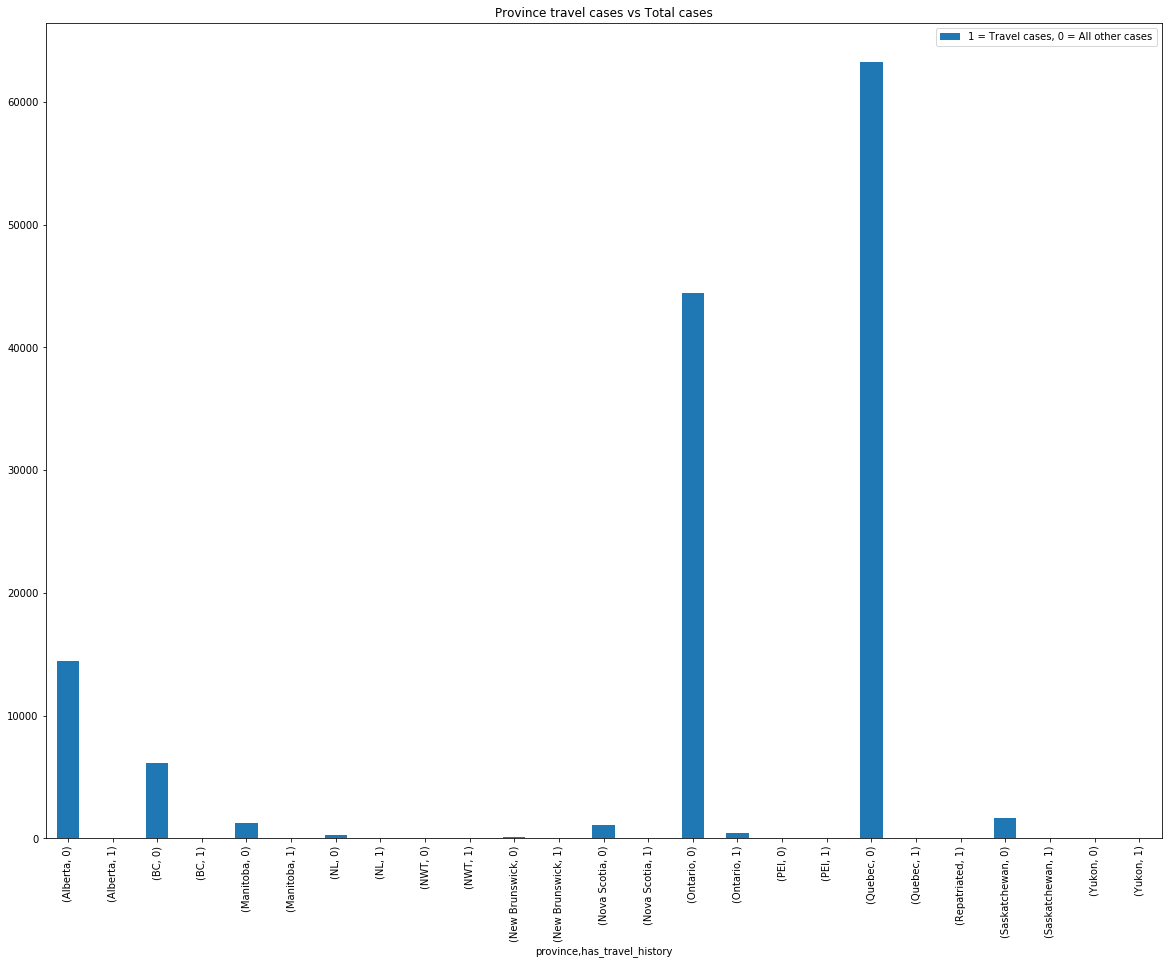

In [66]:
canada_covid_df.groupby(['province','has_travel_history']).size().plot.bar(figsize=(20,15))
plt.legend(['1 = Travel cases, 0 = All other cases'])
plt.title("Province travel cases vs Total cases")

 - Number of travel related cases are very low as compared to overall cases. But these cases were primary factor in spreading this virus across the world.
 - Ontario has maximum travel related covid cases.
 - This shift demonstrates that an increasing number cases are being spread within the community.
 - Cases coming from travellers abroad were, "at the beginning" the cause of 90% of the cases.

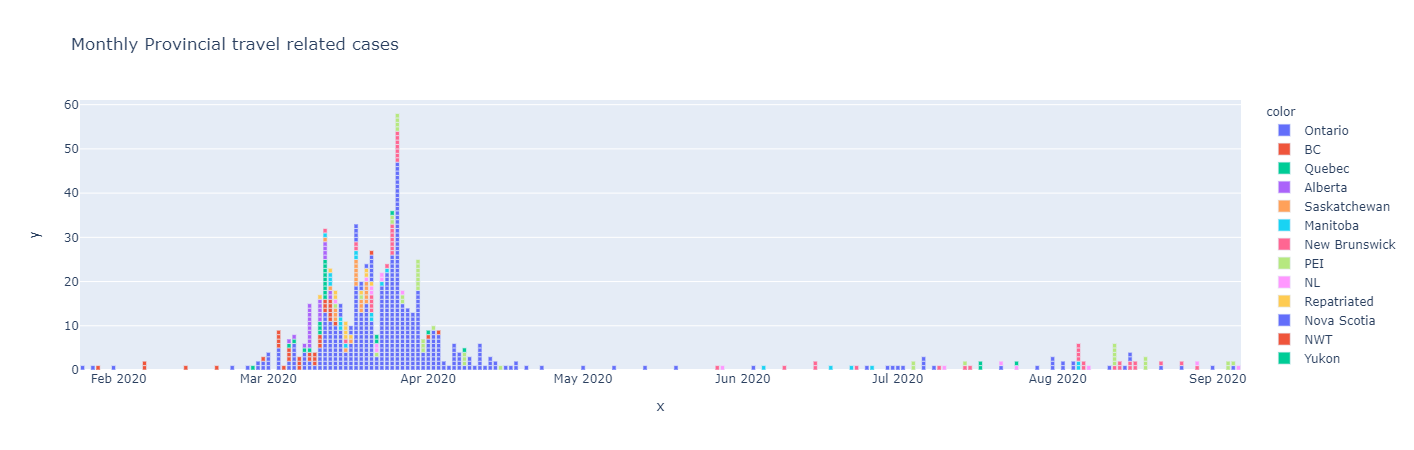

    province date_report  Travel case count
0    Alberta 2020-03-05   1                
1    Alberta 2020-03-06   1                
2    Alberta 2020-03-08   1                
3    Alberta 2020-03-09   10               
4    Alberta 2020-03-11   5                
..       ...        ...  ..                
201  Yukon   2020-03-25   1                
202  Yukon   2020-04-01   1                
203  Yukon   2020-04-08   1                
204  Yukon   2020-07-17   2                
205  Yukon   2020-07-24   1                

[206 rows x 3 columns]


In [68]:
fig = px.bar(x = travel_cases_df['date_report'],y=travel_cases_df['has_travel_history'], color=travel_cases_df['province'],title="Monthly Provincial travel related cases")
fig.show()
print(travel_cases_df.groupby(['province','date_report']).size().reset_index(name='Travel case count'))

 - Here we can see a significant spike in the number of the cases related to travel in the Month of **Mar, and Apr**.
 - **March and April** can be viewed as hotspot months for spreading this virus globally because most countries implemented travel restrictions in or after march.
 - After the month of April we can see a drop of more than **~90%** in the cases related to travel.

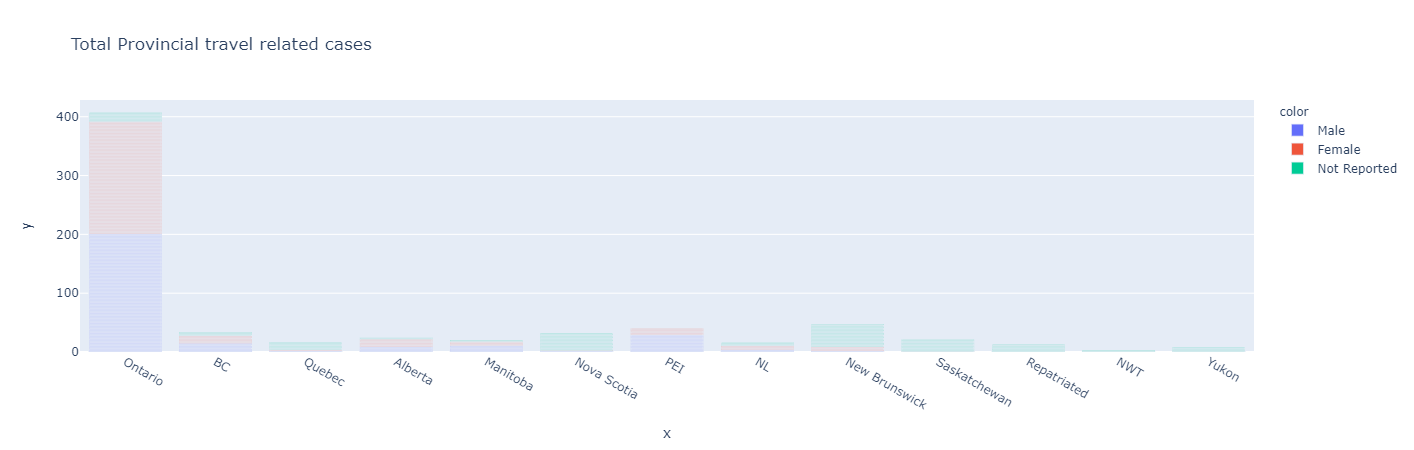

         province  Travel related cases
0   Alberta        24                  
1   BC             34                  
2   Manitoba       20                  
3   NL             16                  
4   NWT            3                   
5   New Brunswick  47                  
6   Nova Scotia    32                  
7   Ontario        407                 
8   PEI            40                  
9   Quebec         17                  
10  Repatriated    13                  
11  Saskatchewan   21                  
12  Yukon          8                   


In [69]:
fig = px.bar(x = travel_cases_df['province'], y = travel_cases_df['has_travel_history'], color=travel_cases_df['sex'], title='Total Provincial travel related cases')
fig.show()
print(travel_cases_df.groupby('province').size().reset_index(name='Travel related cases'))

 - Here we can see **Ontario** has maximum number of COVID-19 cases, and recently **32 new travel** related cases were reported, and public health officials are bracing for more as international college and university students pour into brampton from abroad.
 - **Equal** number of male and female were tested positive for travel related cases.

## Policies implemented by provinces

In [70]:
intervention_scan_data.head()

,Entry ID,Jurisdiction,Level,Date announced,Date implemented,Intervention category,Intervention type,Who Implemented,What Implemented,Effective Until,Indigenous population group,Primary source,timediff,duration
0,BC007,B.C.,Provincial/territorial,2020-03-15,2020-03-16,Case management,Case management — test criteria,"BC Centre for Disease Control, Provincial Health Services Authority",Testing criteria first published. Testing is prioritized for patients with respiratory symptoms who are hospitalized or likely to be hospitalized; health care workers; residents of long term care facilities; part of an investigation of a cluster or outbreak.,NaT,No,http://www.bccdc.ca/health-info/diseases-conditions/covid-19/testing/phases-of-covid-19-testing-in-bc,24.0,0.0
1,ON021,Ont.,Provincial/territorial,2020-03-17,2020-03-17,Closures,Closures — recreation,Office of the Premier,"Closed all facilities providing indoor recreational programs and public libraries, with subsequent extensions (see secondary source column)",2020-06-12,No,https://news.ontario.ca/opo/en/2020/03/ontario-enacts-declaration-of-emergency-to-protect-the-public.html,0.0,87.0
2,ON022,Ont.,Provincial/territorial,2020-03-17,2020-03-17,Closures,Closures — recreation,Office of the Premier,"Closed all theatres including those offering live performances of music, dance and other art forms, as well as cinemas that show movies and concert venues, with subsequent extensions (see secondary source column)",2020-06-12,No,https://news.ontario.ca/opo/en/2020/03/ontario-enacts-declaration-of-emergency-to-protect-the-public.html,0.0,87.0
3,ON023,Ont.,Provincial/territorial,2020-03-17,2020-03-17,Closures,Closures — non-essential services,Office of the Premier,"Closures of all bars and restaurants, except to the extent that such facilities provide takeout food and delivery, with subsequent extensions (see secondary source column)",2020-06-12,No,https://news.ontario.ca/opo/en/2020/03/ontario-enacts-declaration-of-emergency-to-protect-the-public.html,0.0,87.0
4,ON111,Ont.,Provincial/territorial,2020-03-17,2020-03-17,Closures,Closures — daycares,Office of the Premier,"Closures of all licensed child care facilities and EarlyON programs, with subsequent extensions (see secondary source column)",2020-06-12,No,https://news.ontario.ca/opo/en/2020/03/ontario-enacts-declaration-of-emergency-to-protect-the-public.html,0.0,87.0


In [84]:
travel_intervention_df = intervention_scan_data[intervention_scan_data['Intervention category']=='Travel']
travel_intervention_df.head(20)

,Entry ID,Jurisdiction,Level,Date announced,Date implemented,Intervention category,Intervention type,Who Implemented,What Implemented,Effective Until,Indigenous population group,Primary source,timediff,duration
89,CAN128,Can.,Federal,2020-05-29,2020-05-29,Travel,Travel — restrictions,Transport Canada,"Prohibited cruise ships with overnight accommodations carrying more than 100 persons from operating in Canadian waters and passenger vessels with the capacity to carry more than 12 persons from entering Arctic coastal waters (including Nunatsiavut, Nunavik and the Labrador coast)",2020-10-31,No,https://www.canada.ca/en/transport-canada/news/2020/05/minister-garneau-announces-updated-measures-for-cruise-ships-and-passenger-vessels-in-canadian-waters-up-to-october-31-2020.html,0.0,155.0
90,CAN129,Can.,Federal,2020-05-29,2020-07-01,Travel,Travel — restrictions,Transport Canada,"Announced that all passenger vessels (with the exception of cruise ships with overnight accomodations) must follow provincial, territorial, local and regional health authority requirements for timelines and processes to resume operations",NaT,No,https://www.canada.ca/en/transport-canada/news/2020/05/minister-garneau-announces-updated-measures-for-cruise-ships-and-passenger-vessels-in-canadian-waters-up-to-october-31-2020.html,792.0,0.0
91,CAN130,Can.,Federal,2020-05-29,2020-07-01,Travel,Travel — restrictions,Transport Canada,"Lifted restriction allowing all passenger vessels (with the exception of cruise ships with overnight accomodations) to operate in inland rivers and lakes in the N.W.T., Nun. and Y.T.",NaT,No,https://www.canada.ca/en/transport-canada/news/2020/05/minister-garneau-announces-updated-measures-for-cruise-ships-and-passenger-vessels-in-canadian-waters-up-to-october-31-2020.html,792.0,0.0
115,NU065,Nun.,Provincial/territorial,2020-06-01,2020-06-01,Travel,Travel — restrictions,"Government of Nunavut, Chief Public Health Officer",Lifted restrictions on in-territory travel; travel outside Nun. still not recommended,NaT,No,https://gov.nu.ca/executive-and-intergovernmental-affairs/news/covid-19-gn-update-june-1-2020,0.0,0.0
123,AB142,Alta.,Provincial/territorial,2020-06-02,2020-06-02,Travel,Travel — restrictions,Government of Alberta,Implemented enhanced border screening measures at the Alta./U.S. border crossing at Coutts (busiest in the province and open 24 hours),NaT,No,https://www.alberta.ca/release.cfm?xID=72509A85B0A03-E887-D5E7-6DBB576BFE8509D6,0.0,0.0
128,SK103,Sask.,Provincial/territorial,2020-06-02,2020-06-08,Travel,Travel — restrictions,Government of Saskatchewan,Lifted travel restrictions on northwest Saskatchewan,NaT,No,https://www.saskatchewan.ca/government/news-and-media/2020/june/02/covid-19-update-jun-2,144.0,0.0
148,NB104,N.B.,Provincial/territorial,2020-06-04,2020-06-19,Travel,Travel — restrictions,"Premier, Chief Medical Officer of Health",Permitted Canadian residents owning property in N.B. or having immediate family in N.B. to enter the province provided that they self-isolate for 14 days,NaT,No,https://www2.gnb.ca/content/gnb/en/news/news_release.2020.06.0324.html,360.0,0.0
153,NT093,N.W.T.,Provincial/territorial,2020-06-05,2020-06-05,Travel,Travel — restrictions,Government of the Northwest Territories,Re-established a checkpoint for screening at Fort Smith (Alta. border) to address concerns of increased summer travel into N.W.T.; all other border cities remain unrestricted,NaT,No,https://www.gov.nt.ca/en/newsroom/checkpoint-re-established-fort-smith,0.0,0.0
164,CAN132,Can.,Federal,2020-06-08,2020-06-09,Travel,Travel — restrictions,Canada Border Services Agency,"Announced that foreign nationals who are immediate family members of Canadian citizens and permanent residents, and who do not have COVID-19 or exhibit any signs or symptoms of COVID-19, or who do not have reason to believe they have COVID-19, will be exempt from the prohibition on entry to Canada if entering to be with an immediate family member for a period of at lea

In [76]:
travel_intervention_df.columns

Index(['Entry ID', 'Jurisdiction ', 'Level', 'Date announced',
       'Date implemented', 'Intervention category', 'Intervention type',
       'Who Implemented', 'What Implemented', 'Effective Until',
       'Indigenous population group', 'Primary source', 'timediff',
       'duration'],
      dtype='object')

In [77]:
travel_intervention_df.groupby('Jurisdiction ').size()

Jurisdiction 
Alta.     3 
B.C.      6 
Can.      23
Man.      5 
N.B.      8 
N.L.      6 
N.S.      3 
N.W.T.    8 
Nun.      12
Ont.      1 
P.E.I.    4 
Que.      11
Sask.     8 
Y.T.      10
dtype: int64

#### Provincial Travel Restrictions

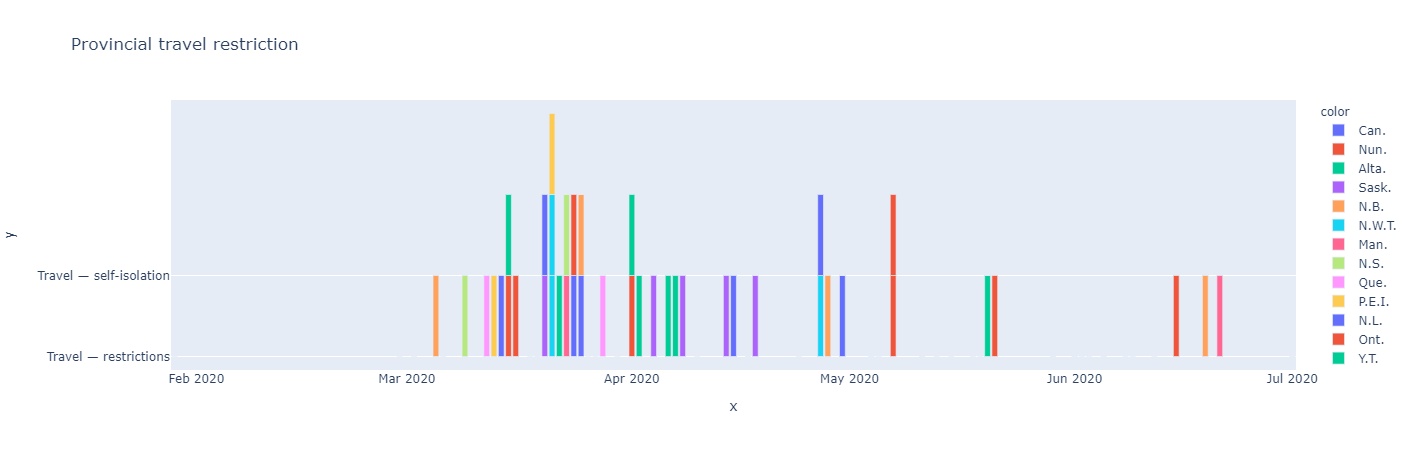

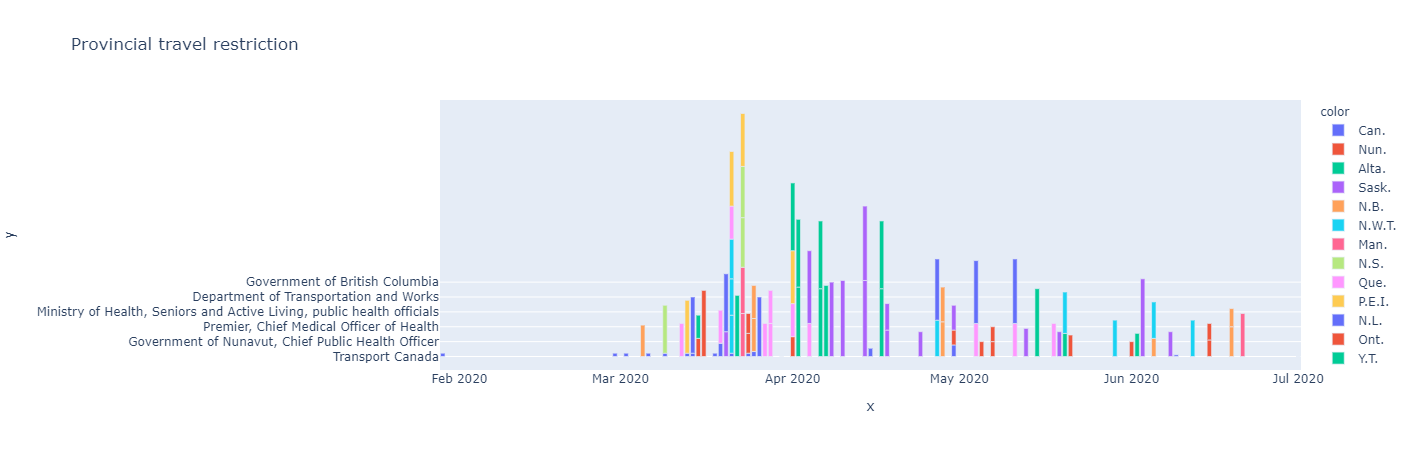

In [87]:
column_name = ['Intervention type','Who Implemented']

for column in column_name:
    
    fig = px.bar(x = travel_intervention_df['Date implemented'], y = travel_intervention_df[column], color=travel_intervention_df['Jurisdiction '], title='Provincial travel restriction')
    fig.show()

 - Here we can see most provinces implemented travel restriction in the month of **March**.
 - Some of the policies that were in effect from march are as follows:
  1. Prohibited cruise ships with overnight accommodations carrying more than 100 persons from operating in Canadian waters and passenger vessels with the capacity to carry more than 12 persons from entering Arctic coastal waters
  2. Announced that all passenger vessels (with the exception of cruise ships with overnight accomodations) must follow provincial, territorial, local and regional health authority requirements for timelines and processes to resume operations
  3. Implemented enhanced border screening measures at the Alta./U.S. border crossing at Coutts (busiest in the province and open 24 hours)
  4. Announced that foreign nationals who are immediate family members of Canadian citizens and permanent residents, and who do not have COVID-19 or exhibit any signs or symptoms of COVID-19, or who do not have reason to believe they have COVID-19, will be exempt from the prohibition on entry to Canada if entering to be with an immediate family member for a period of at least 15 days and they quarantine for 14 days
  5. Reminding Manitobans that the Public Health Agency of Canada is recommending that travellers who have been in the province of Hubei, including the city of Wuhan, self-isolate for 14 days after departing the area
  6. Travellers returning to N.B. from outside Canada are required to self-monitor for symptoms for 14 days

#### Number of policies implemented

In [89]:
tr['What Implemented'] = intervention_scan_data['What Implemented'].astype('str')
text = " ".join(who for who in intervention_scan_data['What Implemented'])
print("There are {} number of policies, which were implemented by above mentioned officials.". format(intervention_scan_data['What Implemented'].nunique()))

There are 1368 number of policies, which were implemented by above mentioned officials.


In [90]:
# Here we are downloading Wordcloud to create wordcloud based on the column values using textmining

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

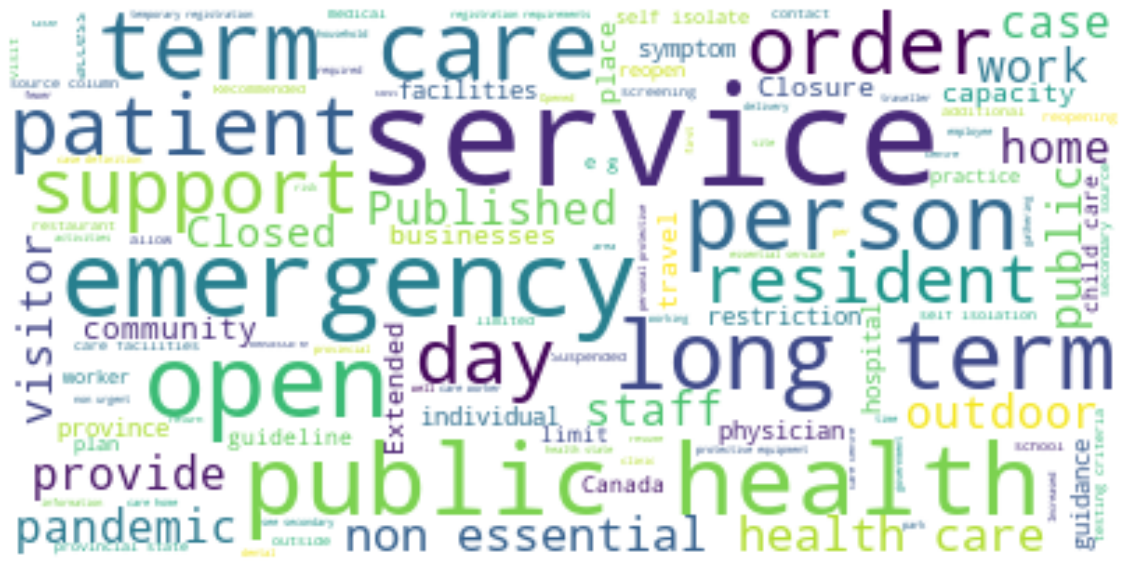

In [92]:
# generating Wordcloud based on the frequency of word.

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["of",",",";","a","an","or","is","for","are","with","to","be","all","(see secondary source column)",
                  "apply","including","COVID","people","include","Launched","region","will","Updated","may",
                  "new","Permitted","must","Issued","source column","Announced","provided","released"])

wc = WordCloud(background_color="white", max_words=2000, stopwords=stopwords, max_font_size=50,
            contour_width=3, contour_color='firebrick')
wc.generate(text)
plt.figure(figsize=(20,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()